In [1]:
% load_ext autoreload
% autoreload 2
% matplotlib inline

In [2]:
from sklearn.cluster import MeanShift, DBSCAN
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import olac

In [3]:
plt.rcParams['figure.facecolor'] = 'white'

In [4]:
rb = np.array(list(olac.data_generators.roving_balls(steps=1000, period=3000)))[:,:-1]
pc = np.array(list(olac.data_generators.cluster_generator(n_points=1000, cluster_width=65)))[:,:-1]
sa = np.array(list(olac.data_generators.satellites(n_points=1000, contamination=0.1)))[:,:-1]
rw1 = np.array(list(olac.data_generators.rand_walk(steps=1000)))
rw2 = np.array(list(olac.data_generators.rand_walk(steps=1000)))
rw = np.hstack([rw1, rw2])

/Users/johnpaton/jads/olac/olac/utils.py:52: UserWarning: The 'utils.rotation_matrix' method is deprecated, use maths.rotation_matrix(theta: float) instead
  warnings.warn("The 'utils.rotation_matrix' method is deprecated, "


In [5]:
datasets = [rb, pc, sa, rw]
names = ['Roving Balls', 'Popping Clusters', 'Satellites', 'Random Walk']

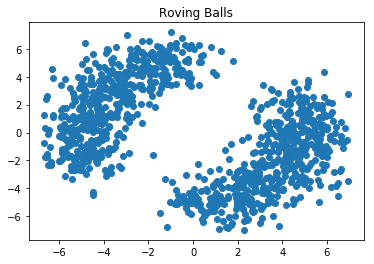

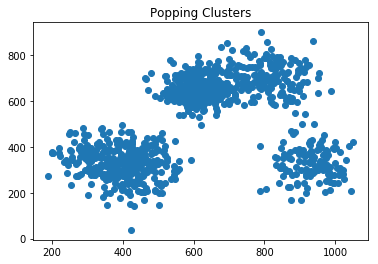

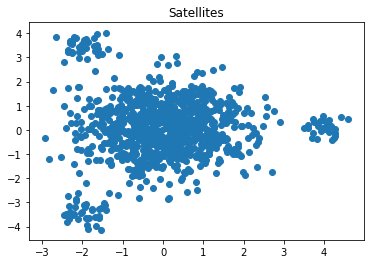

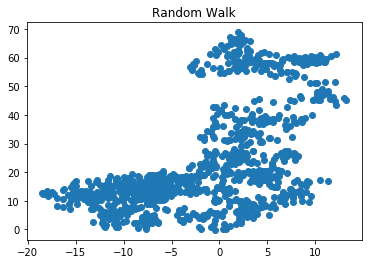

In [6]:
for i, ds in enumerate(datasets):
    plt.scatter(*ds.T)
    plt.title(names[i])
    plt.show()

DBSCAN


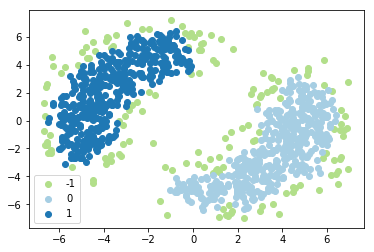

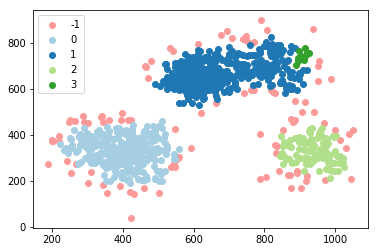

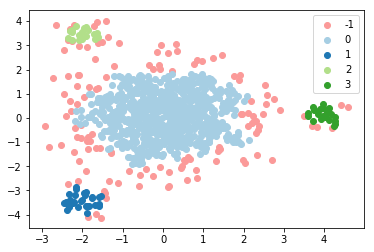

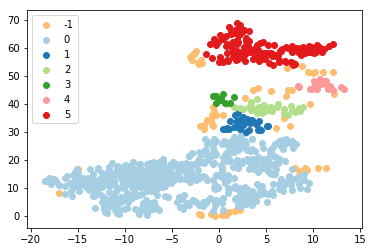

In [7]:
print('DBSCAN')
for ds in datasets:
    eps = (ds.max(axis=0) - ds.min(axis=0)).mean()/25
    m = ds.shape[0]//100
    clusters = DBSCAN(eps=eps, min_samples=m).fit_predict(ds)
    
    cmap = sns.palettes.color_palette('Paired', n_colors=len(np.unique(clusters)))
    for c in np.unique(clusters):
        plt.scatter(*ds[clusters==c].T, label=str(c), c=cmap[c])
        
    
    plt.legend()
    plt.show()

Mean Shift


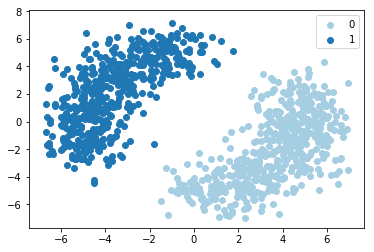

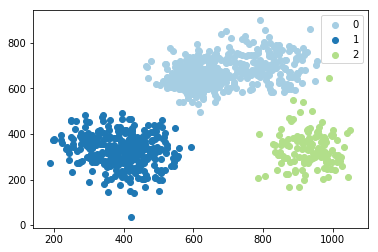

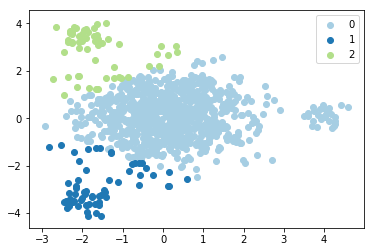

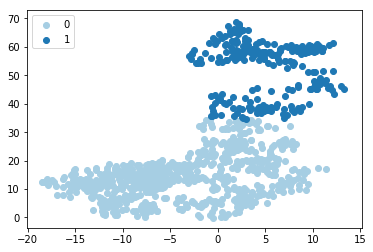

In [8]:
print('Mean Shift')
for ds in datasets:
    clf = MeanShift(cluster_all=True)
    clusters = clf.fit_predict(ds)
    
    cmap = sns.palettes.color_palette('Paired', n_colors=len(np.unique(clusters)))
    for c in np.unique(clusters):
        plt.scatter(*ds[clusters==c].T, label=str(c), c=cmap[c])
    plt.legend()
    plt.show()

DBShift


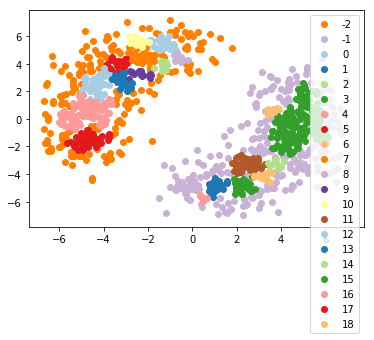

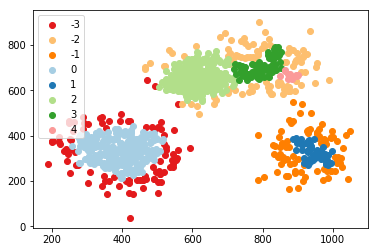

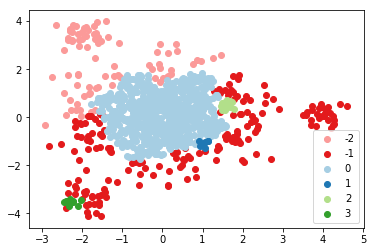

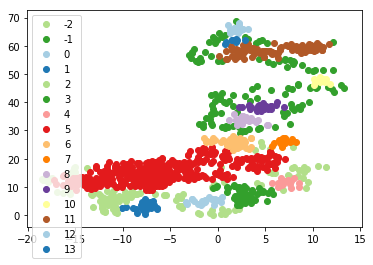

In [9]:
print('DBShift')
for ds in datasets:
    clf = olac.models.DBShift()
    clusters = clf.fit_predict(ds)
    
    cmap = sns.palettes.color_palette('Paired', n_colors=len(np.unique(clusters)))
    for c in np.unique(clusters):
        plt.scatter(*ds[clusters==c].T, label=str(c), c=cmap[c])
    plt.legend()
    plt.show()

In [10]:
def hierarchical_fit(X, min_clust_recurse_size=None, *args, **kwargs):
    
    if min_clust_recurse_size is None:
        min_clust_recurse_size = X.shape[0] // 100
    
#     print(len(X))
    clusters = MeanShift(*args, **kwargs).fit_predict(X)
    unique = np.unique(clusters)
    n = unique.shape[0]
    
    if n == 1:
        return clusters
    
    for c in unique:
        cond = clusters==c
        
        if cond.sum() <= min_clust_recurse_size:
            continue 
    
        try:
            new_clusters = hierarchical_fit(X[cond], min_clust_recurse_size, *args, **kwargs)
        except ValueError:
            continue 
            
        new_clusters += clusters.max() + 1
        clusters[cond] = new_clusters
    
    return clusters - clusters.min()

Hierarchical Mean Shift


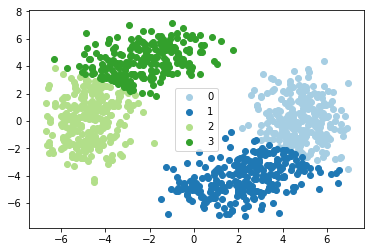

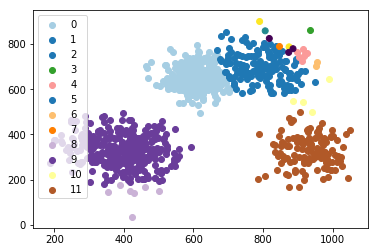

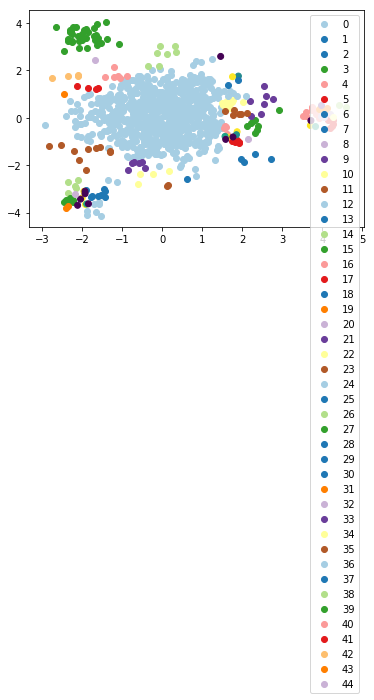

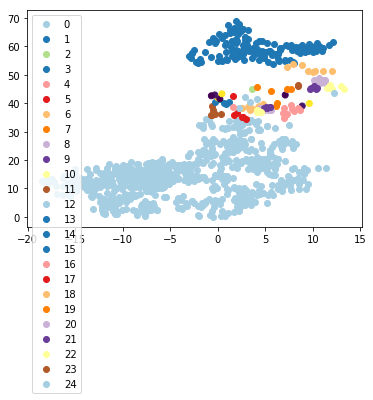

In [11]:
print('Hierarchical Mean Shift')
for ds in datasets:
    clusters = hierarchical_fit(ds)
    
    cmap = sns.palettes.color_palette('Paired', n_colors=len(np.unique(clusters)))
    for c in np.unique(clusters):
        plt.scatter(*ds[clusters==c].T, label=str(c), c=cmap[c])
    plt.legend()
    plt.show()